In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# To plot the function in three Dimension
from mpl_toolkits.mplot3d import Axes3D

import tensorflow as tf

In order to make a synthetic dataset, we implement the function:

    y = cos(2X_1) + cos(3X_2)

In [2]:
# Make a synthetic dataset
N = 1000 # number of samples

# so that datas are center in the range of [-3, 3]
X = np.random.random((N, 2)) * 6 - 3 
y = np.cos(2 * X[:, 0]) + np.cos(3 * X[:, 1])

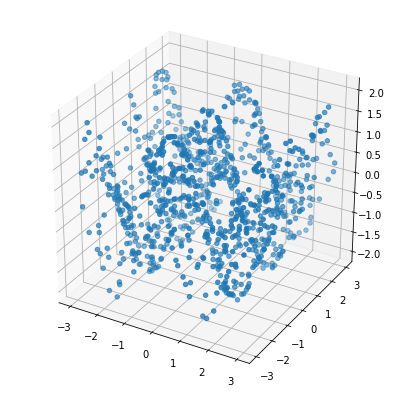

In [3]:
# plot the function
fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y)

In [38]:
# create the model and indicate the parameters
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(2))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [39]:
# compile the model
model.compile(optimizer='Adam',
             loss='mse')

In [40]:
# fit the model to the data
model.fit(X, y, epochs=100)

Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 0s 299us/sample - loss: 1.0124
Epoch 2/100
1000/1000 [==============================] - 0s 56us/sample - loss: 0.9711
Epoch 3/100
1000/1000 [==============================] - 0s 57us/sample - loss: 0.9575
Epoch 4/100
1000/1000 [==============================] - 0s 53us/sample - loss: 0.9434
Epoch 5/100
1000/1000 [==============================] - 0s 69us/sample - loss: 0.9411
Epoch 6/100
1000/1000 [==============================] - 0s 64us/sample - loss: 0.9351
Epoch 7/100
1000/1000 [==============================] - 0s 61us/sample - loss: 0.9276
Epoch 8/100
1000/1000 [==============================] - 0s 62us/sample - loss: 0.9242
Epoch 9/100
1000/1000 [==============================] - 0s 58us/sample - loss: 0.9259
Epoch 10/100
1000/1000 [==============================] - 0s 67us/sample - loss: 0.9187
Epoch 11/100
1000/1000 [==============================] - 0s 64us/sample - loss: 0.9143
Epoch 12/100
1000/

Epoch 94/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.7289
Epoch 95/100
1000/1000 [==============================] - 0s 44us/sample - loss: 0.7247
Epoch 96/100
1000/1000 [==============================] - 0s 46us/sample - loss: 0.7344
Epoch 97/100
1000/1000 [==============================] - 0s 44us/sample - loss: 0.7235
Epoch 98/100
1000/1000 [==============================] - 0s 45us/sample - loss: 0.7132
Epoch 99/100
1000/1000 [==============================] - 0s 45us/sample - loss: 0.7074
Epoch 100/100
1000/1000 [==============================] - 0s 49us/sample - loss: 0.7078


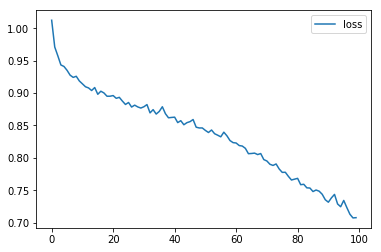

In [42]:
# evaluate the model by plotting the loss
plt.plot(model.history.history['loss'], label='loss')
plt.legend()

In [43]:
print(np.shape(X))

(1000, 2)


In [44]:
# we plot the predicted (fitted) surface on top of the data
# First of all we need a grid to plot the surface
rng = np.linspace(-3, 3, 50)
X_test1, X_test2 = np.meshgrid(rng, rng)
X_test = np.vstack((X_test1.flatten(), X_test2.flatten())).T

# predicted values from the model.
# It should mimic the function y = cos(2X_1) + cos(3X_2)
y_pred = model.predict(X_test).flatten()

print(np.shape(X_test), np.shape(y_pred))

(2500, 2) (2500,)


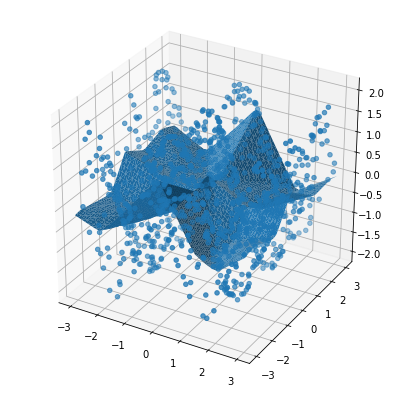

In [47]:
# we now put the actual and predicted function on top of each other
fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y)
ax.plot_trisurf(X_test[:, 0], X_test[:, 1], y_pred, 
                linewidth=0.2,
               antialiased=True)
plt.show()

The model perfrormance is not as expected.
Therefore we try to change the hyperparameters:
    
    1. learning rate in adam optimizer

In [50]:
# create the model and indicate the parameters
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(2))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [51]:
# compile the model
# increase the learning rate
adam = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=adam,
             loss='mse')

In [52]:
# fit the model to the data
model.fit(X, y, epochs=100)

Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 0s 310us/sample - loss: 0.9990
Epoch 2/100
1000/1000 [==============================] - 0s 68us/sample - loss: 0.9496
Epoch 3/100
1000/1000 [==============================] - 0s 60us/sample - loss: 0.9249
Epoch 4/100
1000/1000 [==============================] - 0s 71us/sample - loss: 0.9514
Epoch 5/100
1000/1000 [==============================] - 0s 62us/sample - loss: 0.9010
Epoch 6/100
1000/1000 [==============================] - 0s 76us/sample - loss: 0.8669
Epoch 7/100
1000/1000 [==============================] - 0s 68us/sample - loss: 0.7804
Epoch 8/100
1000/1000 [==============================] - 0s 66us/sample - loss: 0.7129
Epoch 9/100
1000/1000 [==============================] - 0s 64us/sample - loss: 0.7195
Epoch 10/100
1000/1000 [==============================] - 0s 62us/sample - loss: 0.6328
Epoch 11/100
1000/1000 [==============================] - 0s 60us/sample - loss: 0.5638
Epoch 12/100
1000/

Epoch 94/100
1000/1000 [==============================] - 0s 57us/sample - loss: 0.0057
Epoch 95/100
1000/1000 [==============================] - 0s 46us/sample - loss: 0.0050
Epoch 96/100
1000/1000 [==============================] - 0s 50us/sample - loss: 0.0054
Epoch 97/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.0049
Epoch 98/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.0065
Epoch 99/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.0043
Epoch 100/100
1000/1000 [==============================] - 0s 46us/sample - loss: 0.0053


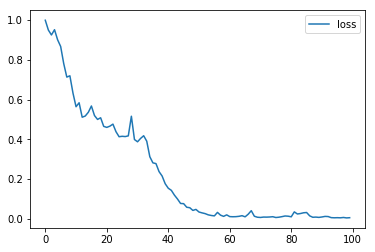

In [53]:
# evaluate the model by plotting the loss
plt.plot(model.history.history['loss'], label='loss')
plt.legend()

In [54]:
# we plot the predicted (fitted) surface on top of the data
# First of all we need a grid to plot the surface
rng = np.linspace(-3, 3, 50)
X_test1, X_test2 = np.meshgrid(rng, rng)
X_test = np.vstack((X_test1.flatten(), X_test2.flatten())).T

# predicted values from the model.
# It should mimic the function y = cos(2X_1) + cos(3X_2)
y_pred = model.predict(X_test).flatten()

print(np.shape(X_test), np.shape(y_pred))

(2500, 2) (2500,)


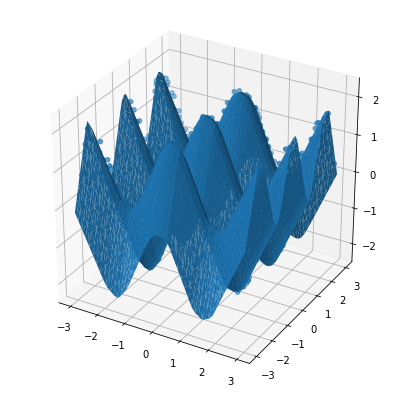

In [55]:
fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y)
ax.plot_trisurf(X_test[:, 0], X_test[:, 1], y_pred, 
                linewidth=0.2,
               antialiased=True)
plt.show()

We would like to see if our model could be extrapolated.

Now the range is between [-5, 5]

In [56]:
# in order to extrapolate we increase the range
rng = np.linspace(-5, 5, 50)
X_test1, X_test2 = np.meshgrid(rng, rng)
X_test = np.vstack((X_test1.flatten(), X_test2.flatten())).T

# predicted values from the model.
# It should mimic the function y = cos(2X_1) + cos(3X_2)
y_pred = model.predict(X_test).flatten()

print(np.shape(X_test), np.shape(y_pred))

(2500, 2) (2500,)


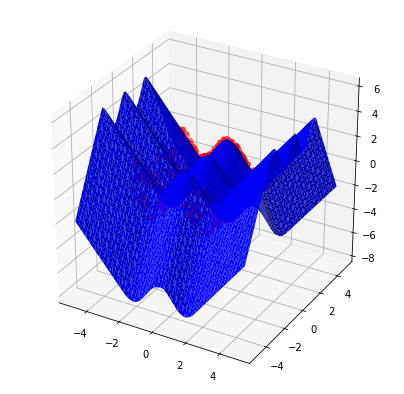

In [62]:
fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], y, c='red')
ax.plot_trisurf(X_test[:, 0], X_test[:, 1], y_pred, 
                linewidth=0.2,
               antialiased=True,
               color='blue')
plt.show()

Which shows explicitly that the model fails to mimic the priodic behavior of the function and could not be extrapolated.